In [84]:
# jupyter notebook extension to reload imports

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
from neatcrat import *
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 100
x = plt.ioff()

In [88]:
file_name = sorted(list(Data.all_file_names))[10]
s:Scene = Scene.from_data(Data(file_name)) # usual pattern to get a scene
p = Plot(-30, 100, -20, 90, 4); 
print(file_name); print(s.third_class)
if s.invalid(): print('EVERY FRAME IS INVALID')
p.draw_scene_with_ego_traj(s, firm_traj_length=10)
# 0 

1007.csv
{0: '1.1.1 LeadVehicleConstant', 1: '1.1.1 LeadVehicleConstant', 2: '1.1.1 LeadVehicleConstant', 3: '1.1.1 LeadVehicleConstant', 4: '1.1.1 LeadVehicleConstant', 5: '1.1.2 LeadVehicleCutOut', 6: '1.1.2 LeadVehicleCutOut', 7: '1.1.2 LeadVehicleCutOut', 8: '9.9.9 Invalid', 9: '9.9.9 Invalid', 10: '9.9.9 Invalid', 11: '9.9.9 Invalid', 12: '2.6.1 NoVehiclesAhead', 13: '2.6.1 NoVehiclesAhead', 14: '2.6.1 NoVehiclesAhead', 15: '2.6.1 NoVehiclesAhead', 16: '2.6.1 NoVehiclesAhead', 17: '2.6.1 NoVehiclesAhead', 18: '2.6.1 NoVehiclesAhead', 19: '2.6.1 NoVehiclesAhead', 20: '2.6.1 NoVehiclesAhead', 21: '2.6.1 NoVehiclesAhead', 22: '2.6.1 NoVehiclesAhead', 23: '2.6.1 NoVehiclesAhead', 24: '2.6.1 NoVehiclesAhead', 25: '2.6.1 NoVehiclesAhead', 26: '9.9.9 Invalid', 27: '9.9.9 Invalid', 28: '9.9.9 Invalid', 29: '9.9.9 Invalid', 30: '9.9.9 Invalid', 31: '9.9.9 Invalid', 32: '9.9.9 Invalid', 33: '9.9.9 Invalid', 34: '9.9.9 Invalid', 35: '9.9.9 Invalid', 36: '9.9.9 Invalid', 37: '1.1.5 LeadVehicl

In [4]:
# BIG FILTER

def get_files_with_label(label):
    names = []
    for file_name in Data.all_file_names:
        if label in Scene.from_data(Data(file_name)).third_class.values():
            names.append(file_name)
    return sorted(names, key=lambda x: int(x.split('.')[0]))

names = get_files_with_label('1.1.1 LeadVehicleConstant')

In [5]:
# file_name = names[15] # 一共有72个 leadvehicleconstant!
file_name = '0.csv'
s:Scene = Scene.from_data(Data(file_name)) # usual pattern to get a scene
print(file_name)
Debug.print_third_class_intervals(s) # tells you which timestamps are of what label (see output)
start = 0; end = 17 # for framing the scene into a scene with a specific label (eg. only leadvehicle constant)

294.csv
1.1.1 LeadVehicleConstant [0 ~ 17]
1.1.2 LeadVehicleCutOut [17 ~ 20]


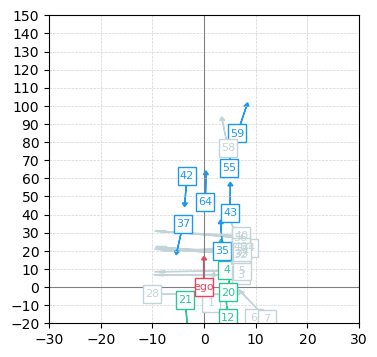

In [6]:
p = Plot(-30, 30, -20, 150, 4); p.draw_scene(s, start, end) # numbers are the dimensions, xmin,xmax,ymin,ymax, usually only need to change ymax, 80~300
# functions drawing videos do not need .show()
# green means not in front, (is_in_front_of function in agent.py), gray means not car (bikes and stuff)

False


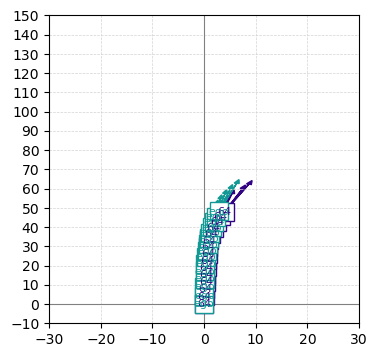

In [7]:
p = Plot(-30, 30, -10, 150, 4)

i=end+1; rg=15; tr=1; dt=11

t = s.trajectories['64']; e = s.trajectories['ego'] # get the agent you think is the main related agent
# note: slicing trajectory returns a list of agents

# this is testing an old algorithm, can ignore
# fyi: description of the old algorithm
# 1. find the timestamp where ego first touches leading vehicle's trajectory (dt (delta) in this case)
# 2. extend trajectory for both agents from there for a period of time (rg (range) in this case)
# 3. translate extended trajectories to origin and see if they match (tr (translate) means translate to origin or not, could toggle and test)
# maybe translating to origin is unnecessary... i don't know why i implemented that, keep if you think it will be useful later on.
p.draw_trajectory(Debug.translate_trajectory(t, t[start].x*tr, t[start].y*tr), start, start+rg, '#320483')
p.draw_trajectory(Debug.translate_trajectory(e, e[start+dt].x*tr, e[start+dt].y*tr), start+dt, start+dt+rg, '#129994')
p.show()

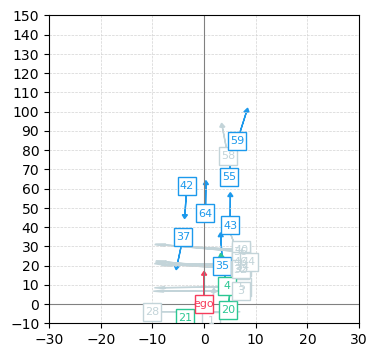

In [ ]:
p = Plot(-30, 30, -10, 150, 4)
s:Scene = Scene.from_data(Data(file_name)) # usual pattern to get a scene

p.draw_scene(s)

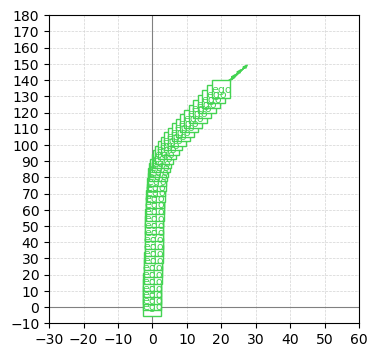

In [ ]:
p = Plot(-30, 60, -10, 180, 4)

p.draw_trajectory(s.trajectories['ego'], 0, 40)
p.show()